Importation

In [1]:
import os
import yake

# d'autres importation

from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

# Le reste des imports

from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
%pip install  fr_core_news_md

[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


Extraction des mots clés avec Yake

In [2]:
# On veut extraire les fichier de 1914

year = 1914 # Début du 1ère guerre

# Le dossier dans lequel se trouve l'ensemble de nos fichier
data_path = "../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt') and str(year) in f]

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Imprimer le nombre de fichiers identifiés
len(files)


100

Extraction de tous les mots clé de l'année 1914

In [3]:
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1914-01-01_01-00004.txt mentions these keywords: Fragson venait, plus grande, plus fie, plus meurtrière, rte plus...
KB_JB838_1914-01-02_01-00007.txt mentions these keywords: Agence Rossel, demande JEUNE, dem. fem, l’Agence Rossel, SERVEUSE Rue, ETRENNES UTILES, rue Jourdan, DEMANDE bon, RUE NEUVE, traitement Initial, Agence Rossai, demande faire...
KB_JB838_1914-01-10_01-00004.txt mentions these keywords: JANVIH Caleris, Congo paris, VENTE PUBLIQUE, Congo Belge, Froment blanc...
KB_JB838_1914-01-14_01-00008.txt mentions these keywords: Envol franco, Menthe Gripekoven, Charbon Gripekoven, dentifrice Rhelngold, chaux granulé, CHAUX GRIPEKOVEN, QUINQUINA GRIPEKOVEN, GRIPEKOVEN C’est, maux d’estomac, GRANULES GRIPEKOVEN, lithine granulée...
KB_JB838_1914-01-15_01-00002.txt mentions these keywords: loi scolaire, centime additionnel, Parlement belge, maison Krupp, instituteurs libres, Seconde Chambre...
KB_JB838_1914-01-16_01-00003.txt mentions these keywords: DERNIERE HEU, Mme Sar

Initialisation des stopwords

In [4]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "dés", "bruxelles"]
sw = set(sw)


Création d'un seul fichier contenant l'ensemble des fichiers de l'année 1914

In [5]:
# Stocker le contenu de ces fichiers dans une liste

txt_path = '../data/txt'

content_list = []
for txt in files:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_1'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

La fonction pour nettoyer les imperfections de l'OCR

In [6]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

# Application de la fonction clean_text

clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:1000]

'OBJ ERDÜS ENT FRANCS RÉEOMP AOL RAPPORTERA PETIT GRIFFON PERDU RUE BUANDERIE PÈRE SOLDA TARAIS LIÈGE PER JEUDI MAT LETTRE FILA BAPPORT EOAT RÉO RUE CORNET TUBERCULOSE PHTISIE GUÉRIE ENSEIGNER TIUTLTUT JASQUE PLAOE JAOQUEA LIÈGE INT JEUNES FLLLESI PRÉPAR UNLVERSITÉI PIT JAUNES FILLES FRÉQ UNIVERSITÉ ÉLÈV RINSL PRÉSENT DIFFÉR FAOULTÉ LIÈGE SET JUIN RIMAI GRAND ÉTABL INSTR MOYENNE SEPT PROF DESSIN PROF STÉNO DACT DEAX SURVEILLANTS INTPRN ADR BOSSCL IFONSLEUR AFFECTION TUE LLLDOM GNLDE LNSTRNETION MOYENNE MOIS RÉFÉRENCES EXIGÉES AGENCE ROSEEL DEMANDE CONVERSATION ROSMI POSITION LNÉRATIYË TONTE PERSONNE ÉON SACRER LOISIRS OOMMÉ AGENT REEHEREHE SARANOES VIE OOMRAU NLON ETC DENT ELASSES RRLÈRE BOORGEOLSE SUFFIT SAVOIR LIRE ÉORLRE INNPEOTENR MET AUEONR AIDE LEE ASSORANO ADREESEO TOAS EONDITIONS POPULALRE OÇLÉTÉOOO OÉRATLTE PLACE ROUPPT RÉALISÉ JOUR MILLIONS AFFAIRES PAYÉ ASTURÉS PRÈS SEPT MILLIONS CAUTION RERAER SOM EMPLOYÉE SIEURS DEMOISELLES BOSTCL OUVRIER OHOEO MATIER SAOH ORÈM PROVINCE BO

Nuages des Mots et la création de l'images de ces mots

[('RUE', 4103), ('PRIX', 1038), ('ANS', 998), ('MAISON', 960), ('LOUER', 932), ('BON', 865), ('FILLE', 771), ('TRÈS', 736), ('DEMANDE', 661), ('HEURES', 631)]


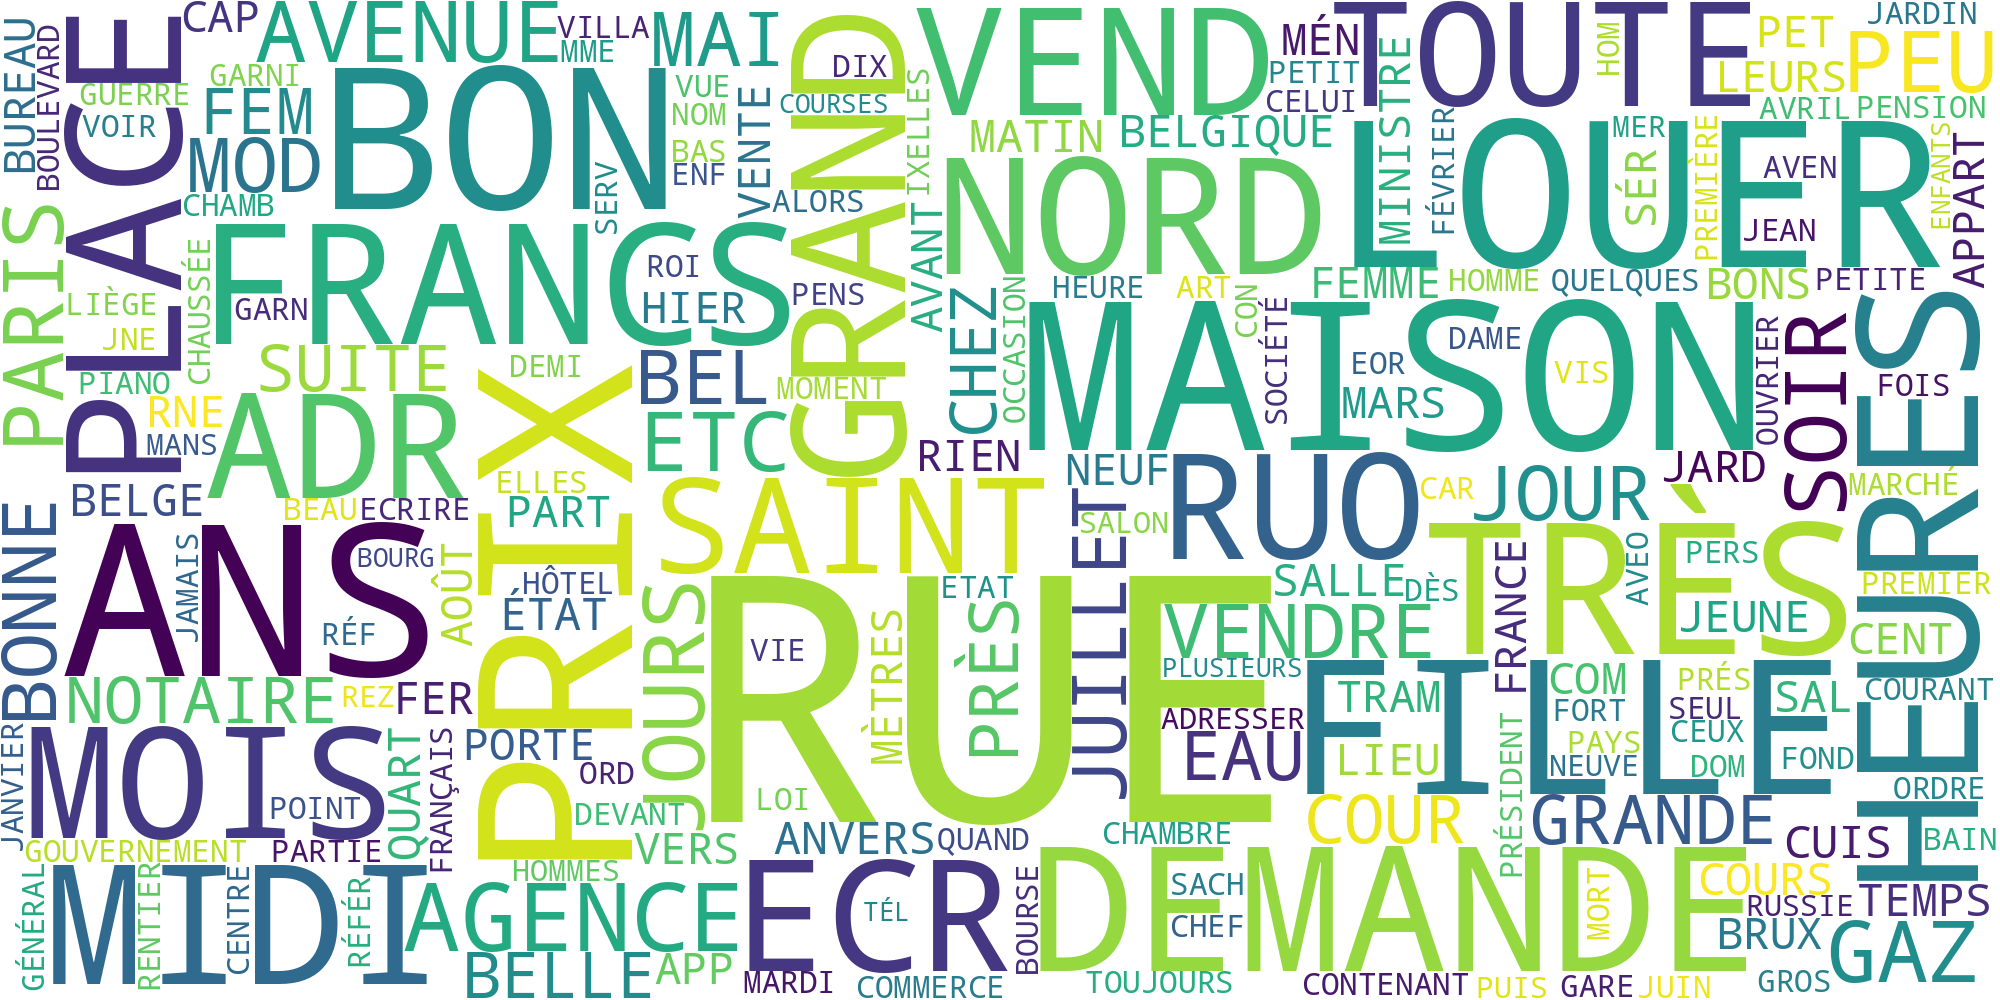

In [7]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

Utilisation de Spacy

In [8]:
nlp = spacy.load('fr_core_news_md')

Recherche des entités nommées cette année 1914

In [14]:
# Chargeons les 1000 permier mots de notre fichier nottoyé
n=1000
text = open("../data/tmp_1/1914_clean.txt", encoding='utf-8').read()[:n]

# Affichage du text

text


# Traiter le texte

doc = nlp(text)

# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1


# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Etape 6, Selection de dix phrase aux hasard

In [9]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [10]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

Ici, nous avons choisie au hasard des phrases dans differents fichier de l'année 1914

In [11]:
phrases = [
    'Les actionnaires que son service des dépôts A découvert se charge gratuitement de la garde des actions de la Banque.',
    'Par bonheur, il entendit à ce moment un hululement: très faible de chouette qui lui indiqua la direction à prendre, et il aperçut bientôt la petite lueur d’une lanterné, qui devait être celle dè sa voiture.',
     'il ne lui reprochait que le nombre trop grand de ses affaires dans l’Europe entière.',
     ' M. Spitzer n’admît pas un seul instant cette appréciation, et donna sur l’heure sa démission.',
     ' Maintenant, Jeanne n’avait plus le plaisir de, soigner sa coiffure compliquée, dont elle était autrefois si fière, ni de polir ses ongles.',
     'On nous annonce la mort do Mlle Jeanne Vleren-’deels, décédée le 19 courant. L\'enterrement aura lieu jeudi 21 courant, A 2 h, 1/2.',
     'Du programme: « Miss Helyett », avec la même distribution.  .Vaudeville. — « Une Grosse Affaire », la joyeuse pièce de MM. Hennequin et Vébor, superbement montée, costumée, décorée, est un des plus jolis spectacles qu’il soit possible d’applaudir Son succès grandit à chacune dos représentations.',
     'Je ne savais plus si Je devais, ou non, me réjouir; pourtant, ma satisfaction subsistait d’avoir quitté ina belle- mère, secoué son joug tyrannique et fait acte d’indépendance.',
     'Le gouvernement de la République d\'Argentine, le gouvernement de la République Chinoise, le gouvernement de la République Mexicaine ont fait savoir au gouvernement belge, par l’entremise de leur légation à Bruxelles, qu’ils observeront une stricte neutralité pendant la truerre actuelle.',
     'Sir Gréy, en remettant cette note à l’ambassadeur d’Autriche- Hongrie, a déclaré que l’Angleterre s’y associait, et qu’en conséquence l’état de guerre']


#phrases[0]

In [12]:
for phrase in phrases:
    get_sentiment(phrase)

This text is 10% positive and 10% subjective.
This text is 11% positive and 43% subjective.
This text is 15% positive and 15% subjective.
This text is neutral and 18% subjective.
This text is 18% positive and 50% subjective.
This text is 10% positive and 20% subjective.
This text is 26% positive and 47% subjective.
This text is 31% positive and 53% subjective.
This text is neutral and 8% subjective.
This text is neutral and perfectly objective.
